# Finding georeferenced sequential frequent patterns in sequence databases using GFSPm

This tutorial has two parts. In the first part, we describe the basic approach to find georeferenced sequential frequent patterns in a sequence database using the GFSPm algorithm. In the final part, we describe an advanced approach, where we evaluate the prefixSpan algorithm on a dataset at different *maximum distance* threshold.

## Prerequisites:

1. Installing the PAMI library

In [ ]:
!pip install -U pami

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.6/884.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 13.4 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3313 sha256=24f1ed9be33fd1ed8fc41dd2caf57e0cb08ec766f341eaf8c4c90382b0fcc91e
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4753 sha256=a8dd07feffdb5db4316575fece7ff4b73e6cb757aeaa95920fc5dfb8aeef444d
  Stored in directory: /root/.cache/pip/wheels/1d/4c/d3/4d9757425983b43eb709be1043d82cd03fb863ce5f56f117e6
Successfully built JsonForm JsonSir


2. Downloading a sample dataset

In [ ]:
!wget -nc https://www.dropbox.com/scl/fi/c2xdmns7rprxnkgd9h3gb/airPollution.csv?rlkey=q7zoop7mi2n4z3qi94lpc1jlf&dl=0

--2023-11-21 07:30:01--  https://www.dropbox.com/scl/fi/c2xdmns7rprxnkgd9h3gb/airPollution.csv?rlkey=q7zoop7mi2n4z3qi94lpc1jlf
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0f6fc9da65edd4e50ccf7c1239.dl.dropboxusercontent.com/cd/0/inline/CH_pZrItIDYbZ9UTzu3Ti4pZ4Wyc4xkmJLhsiQ76BOz3uhXivthBAnKKjpfd-yUe1aPRLDl85sEAzbO2CyN8dyzQlSsG1_CpFqBQ9iJGLZsi8M3ccuY8RNEysHIF9qdWVpJbDHnzSfSI6ytB0GIgLxfp/file# [following]
--2023-11-21 07:30:02--  https://uc0f6fc9da65edd4e50ccf7c1239.dl.dropboxusercontent.com/cd/0/inline/CH_pZrItIDYbZ9UTzu3Ti4pZ4Wyc4xkmJLhsiQ76BOz3uhXivthBAnKKjpfd-yUe1aPRLDl85sEAzbO2CyN8dyzQlSsG1_CpFqBQ9iJGLZsi8M3ccuY8RNEysHIF9qdWVpJbDHnzSfSI6ytB0GIgLxfp/file
Resolving uc0f6fc9da65edd4e50ccf7c1239.dl.dropboxusercontent.com (uc0f6fc9da65edd4e50ccf7c1239.dl.dropboxusercontent.com)... 162.125.80.15,

In [ ]:
!wget https://github.com/UdayLab/PAMI/tree/main/notebooks/sequencePatternMining/basic/Air_100k.txt

In [ ]:
!mv airPollution.csv?rlkey=q7zoop7mi2n4z3qi94lpc1jlf airPollution.csv

In [ ]:
!head -3 airPollution.csv

,TimeStamp,POINT(137.2331301 36.7425277),POINT(140.8733429 38.2932172),POINT(139.1103334 36.2974922),POINT(140.957261 37.6422006),POINT(139.2619009 36.0594871),POINT(135.5188107 34.7919888),POINT(141.7627117 40.1916885),POINT(140.7468006 41.8188869),POINT(139.7422865 36.2305774),POINT(133.9318657 34.4600964),POINT(139.993363 35.6771308),POINT(140.5346664 36.3965854),POINT(139.9382318 35.374032),POINT(140.138552 35.611391),POINT(139.0960211 36.4047323),POINT(135.7079001 34.6916695),POINT(139.3678037 35.4666052),POINT(134.2940462 34.7473902),POINT(140.1460666 35.3335387),POINT(135.0986062 34.6935289),POINT(139.7638423 35.93410739999999),POINT(136.8127001 35.1404408),POINT(135.790301 34.509211),POINT(139.3908038 35.446427),POINT(133.7758944 34.6007931),POINT(139.6624281 35.4151966),POINT(140.4021967 36.555081),POINT(138.5998848 35.1758502),POINT(130.601994 32.507843),POINT(132.2165637 34.1698473),POINT(139.466145 35.4718748),POINT(137.7915988 34.7918944),POINT(138.9138437 36.323256),POINT

In [ ]:
import pandas as pd
dataset = pd.read_csv('airPollution.csv', index_col="TimeStamp")

dataset
# you can notice that dataset is collected from 2018-01-01 01:00:00 hours to 2023-04-25 22:00:00 hours (5+ years)

,Unnamed: 0,POINT(137.2331301 36.7425277),POINT(140.8733429 38.2932172),POINT(139.1103334 36.2974922),POINT(140.957261 37.6422006),POINT(139.2619009 36.0594871),POINT(135.5188107 34.7919888),POINT(141.7627117 40.1916885),POINT(140.7468006 41.8188869),POINT(139.7422865 36.2305774),...,POINT(139.6184164 35.402381),POINT(133.7693672 34.5091621),POINT(134.5801986 34.90361180000001),POINT(130.9395423 33.8302551),POINT(141.6892571 42.6698527),POINT(130.3518793 32.088342),POINT(141.6309688 42.6576551),POINT(138.4066959 34.9960412),POINT(140.0499266 39.3839601),POINT(130.4674218 32.9808242)
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2021-07-01 01:00:00,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,NaN,NaN,1.0,14.0,4.0,NaN,8.0,5.0,23.0
2021-07-01 02:00:00,1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,NaN,NaN,1.0,5.0,5.0,NaN,6.0,4.0,18.0
2021-07-01 03:00:00,2,4.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,...,NaN,NaN,NaN,2.0,4.0,3.0,NaN,6.0,4.0,9.0
2021-07-01 04:00:00,3,11.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,...,7.0,NaN,NaN,3.0,1.0,4.0,NaN,2.0,5.0,1.0
2021-07-01 05:00:00,4,10.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,8.0,NaN,NaN,3.0,2.0,4.0,NaN,3.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-24 18:00:00,3521,7.0,NaN,NaN,NaN,12.0,NaN,2.0,NaN,NaN,...,11.0,NaN,NaN,20.0,3.0,11.0,NaN,7.0,9.0,12.0
2022-07-24 19:00:00,3522,8.0,NaN,NaN,NaN,10.0,NaN,2.0,NaN,NaN,...,4.0,NaN,NaN,18.0,34.0,10.0,NaN,8.0,8.0,11.0
2022-07-24 20:00:00,3523,4.0,NaN,NaN,NaN,9.0,NaN,4.0,NaN,NaN,...,9.0,NaN,NaN,25.0,1.0,10.0,NaN,6.0,705.0,14.0


In [ ]:
dataset = dataset.fillna(0)
dataset.head()

,Unnamed: 0,POINT(137.2331301 36.7425277),POINT(140.8733429 38.2932172),POINT(139.1103334 36.2974922),POINT(140.957261 37.6422006),POINT(139.2619009 36.0594871),POINT(135.5188107 34.7919888),POINT(141.7627117 40.1916885),POINT(140.7468006 41.8188869),POINT(139.7422865 36.2305774),...,POINT(139.6184164 35.402381),POINT(133.7693672 34.5091621),POINT(134.5801986 34.90361180000001),POINT(130.9395423 33.8302551),POINT(141.6892571 42.6698527),POINT(130.3518793 32.088342),POINT(141.6309688 42.6576551),POINT(138.4066959 34.9960412),POINT(140.0499266 39.3839601),POINT(130.4674218 32.9808242)
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2021-07-01 01:00:00,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,1.0,14.0,4.0,0.0,8.0,5.0,23.0
2021-07-01 02:00:00,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,1.0,5.0,5.0,0.0,6.0,4.0,18.0
2021-07-01 03:00:00,2,4.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,2.0,4.0,3.0,0.0,6.0,4.0,9.0
2021-07-01 04:00:00,3,11.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,...,7.0,0.0,0.0,3.0,1.0,4.0,0.0,2.0,5.0,1.0
2021-07-01 05:00:00,4,10.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,8.0,0.0,0.0,3.0,2.0,4.0,0.0,3.0,5.0,6.0


In [ ]:
class convertDenseDataframe2SequenceDatabase:

  seq=[]
  def __init__(self,df,minScore):

      hour=0
      row=[]
      last=str(0000)
      for i in df.index:
          if last!=i[6:10] and row!=[]:
              row.pop()
              self.seq.append(row)
              row=[]
          last=i[6:10]
          for k in df.columns[1:]:
              if k != "TimeStamp":
                  if df.loc[i,k]>=minScore:
                      row.append(k)
          if row!=[] and row[-1]!=-1:
              row.append(-1)
      self.seq.append(row)

  def getSequence(self):
    return self.seq

  def save(self,outputFileName):
        with open(outputFileName, 'w') as f:
            for d in self.seq:
                for i in d:
                    p=str(i).replace(" ",",")
                    f.write("%s\t" % p)
                f.write("\n")

In [ ]:
dataset = pd.read_csv('airPollution.csv',index_col="TimeStamp")
x=convertDenseDataframe2SequenceDatabase(dataset,15)
seq=x.getSequence()
x.save("airDatabase.txt")


#### 4 Printing few lines of a dataset to know its format.

##### 4.1 sequential dataset

In [ ]:
!head -2 airDatabase.txt

POINT(130.601994,32.507843)	POINT(132.2165637,34.1698473)	POINT(136.6548337,35.0051925)	POINT(130.2113464,32.7321302)	POINT(132.7326196,33.8884275)	POINT(130.3597423,33.5840497)	POINT(130.4105582,33.6051041)	POINT(132.7283802,33.8225127)	POINT(140.1138229,37.919914)	POINT(130.4674218,32.9808242)	-1	POINT(130.601994,32.507843)	POINT(132.2165637,34.1698473)	POINT(132.7326196,33.8884275)	POINT(130.3597423,33.5840497)	POINT(136.603013,36.598011)	POINT(130.4105582,33.6051041)	POINT(132.7283802,33.8225127)	POINT(130.4674218,32.9808242)	-1	POINT(130.601994,32.507843)	POINT(132.2165637,34.1698473)	POINT(130.3597423,33.5840497)	POINT(132.7283802,33.8225127)	-1	POINT(130.601994,32.507843)	POINT(136.6548337,35.0051925)	POINT(130.3597423,33.5840497)	POINT(132.7283802,33.8225127)	-1	POINT(130.601994,32.507843)	POINT(140.1138229,37.919914)	-1	POINT(130.601994,32.507843)	POINT(141.6892571,42.6698527)	-1	POINT(136.603013,36.598011)	-1	POINT(136.603013,36.598011)	-1	POINT(136.6548337,35.0051925)	POINT(

_format:_ every row contains items seperated by a seperator in one sequence.
        _ every row contains subsequence seperated by a "-1".

__Example:__

item1 item2 -1 item3 item4


item1 item4 -1 item6

#### 4.2 convert table to Neighbor dataset

##### table data

In [16]:
!head -2 tableforAir.txt #point longitude　latitude  

POINT(130.601994,32.507843)	130.601994	32.507843
POINT(132.2165637,34.1698473)	132.2165637	34.1698473


Neighbordata
_format:_ first item in a row : main item
           the other items in a row : main item's neighbor

item1 item2 item3 item4

item2 item1

item3 item1 item4

item4 item1 item3

*item1 has 3 neighbors

In [1]:
#converter for this table
import numpy as np
import math
def caldis(table, point1, point2):
    pole_radius = 6356752.314245  # 極半径
    equator_radius = 6378137.0
    lat_kamata = math.radians(table[point1][1])
    lon_kamata = math.radians(table[point1][0])
    lat_yokosukachuo = math.radians(table[point2][1])
    lon_yokosukachuo = math.radians(table[point2][0])

    lat_difference = lat_kamata - lat_yokosukachuo  # 緯度差
    lon_difference = lon_kamata - lon_yokosukachuo  # 経度差
    lat_average = (lat_kamata + lat_yokosukachuo) / 2  # 平均緯度

    e2 = (math.pow(equator_radius, 2) - math.pow(pole_radius, 2)) \
         / math.pow(equator_radius, 2)  # 第一離心率^2

    w = math.sqrt(1 - e2 * math.pow(math.sin(lat_average), 2))

    m = equator_radius * (1 - e2) / math.pow(w, 3)  # 子午線曲率半径

    n = equator_radius / w  # 卯酉線曲半径

    distance = math.sqrt(math.pow(m * lat_difference, 2) \
                         + math.pow(n * lon_difference * math.cos(lat_average), 2))  # 距離計測
    return distance



def converter(file1, file2, sep, maxdis):

    table = {}
    neighbor={}
    with open(file1, 'r') as f1:
        with open(file2, 'w') as f2:
            for line in f1:
                line=str(line)
                list = line.strip().split(sep)
                table[list[0]]=[float(list[1]),float(list[2])]
            tablelist=[i for i in table.keys()]
            for point1 in range(len(table.keys())-1):
                for point2 in range(len(table.keys())-point1):
                    dis=caldis(table,tablelist[point1],tablelist[point1+point2])
                    if dis<=maxdis and tablelist[point1]!="-1" and tablelist[point1+point2]!="-1" and tablelist[point1]!="-2" and tablelist[point1+point2]!="-2":
                        if tablelist[point1] not in neighbor:
                            neighbor[tablelist[point1]]=[]
                            neighbor[tablelist[point1]].append(tablelist[point1])
                        neighbor[tablelist[point1]].append(tablelist[point1+point2])
                        if tablelist[point1+point2] not in neighbor:
                            neighbor[tablelist[point1+point2]]=[]
                            neighbor[tablelist[point1+point2]].append(tablelist[point1+point2])
                        neighbor[tablelist[point1+point2]].append(tablelist[point1])
            length=0
            avelen=0
            for v,i in neighbor.items():
                f2.write(str(v) + sep)
                length+=len(i)
                avelen+=1
                for key in i:
                    f2.write(str(key) + sep)
                f2.write("\n")




In [2]:
converter('tableforAir.txt', 'Air_100k.txt', "\t",100000)

In [14]:
!head -2 Air_100k.txt

POINT(130.601994,32.507843)	POINT(130.601994,32.507843)	POINT(130.601994,32.507843)	POINT(130.601994,32.507843)	POINT(130.2113464,32.7321302)	POINT(130.4674218,32.9808242)	POINT(130.3518793,32.088342)	POINT(130.7589282,32.2064635)	POINT(131.1143787,32.9387289)	POINT(130.6384926,32.5010333)	POINT(130.6308774,32.765727)	
POINT(130.2113464,32.7321302)	POINT(130.2113464,32.7321302)	POINT(130.601994,32.507843)	POINT(130.2113464,32.7321302)	POINT(130.2113464,32.7321302)	POINT(130.3597423,33.5840497)	POINT(130.4105582,33.6051041)	POINT(130.4674218,32.9808242)	POINT(130.3518793,32.088342)	POINT(130.7589282,32.2064635)	POINT(131.1143787,32.9387289)	POINT(130.6384926,32.5010333)	POINT(129.7798616,33.1447725)	POINT(130.6308774,32.765727)	


## Part 1: Finding georeferenced sequential frequent pattern using GFSPm

### Step 1: Understanding the statistics of a sequence database

In [ ]:
#import the class file
from PAMI.extras.dbStats import SequentialDatabase as stats

#specify the file name
inputFile = 'airDatabase.txt'
#initialize the class
obj=stats.SequentialDatabase(inputFile,sep='\t')

#execute the class
obj.readDatabase()

### Step 2: Draw the items' frequency graph and sequence length's distribution graphs for more information

In [ ]:
obj.printStats()

Database size (total no of sequence) : 135
Number of items : 121
Minimum Sequence Size : 1
Average Sequence Size : 20.955555555555556
Maximum Sequence Size : 24
Standard Deviation Sequence Size : 6.568010766746562
Variance in Sequence Sizes : 43.460696517412934
Sequence size (total no of subsequence) : 2829
Minimum subSequence Size : 1
Average subSequence Size : 18.83457051961824
Maximum subSequence Size : 104
Standard Deviation Sequence Size : 18.84802364721196
Variance in Sequence Sizes : 355.37361350890427


### Step 3: Choosing an appropriate *minSup* value and maxDis

In [17]:
minSup= 0.4 #minSup is specified in count. However, the users can also specify minSup between 0 and 1.
#maxSis is decided when you make a neighbor file
#in this time maxDis=100k

### Step 4:Mining georeferenced sequential frequent pattern using GFSPm

In [23]:
from PAMI.georeferencedFrequentSequencePattern.basic import GFSPminer as alg
inputFile = 'airDatabase.txt'
NeighborFile="Air_100k.txt"

_ap = alg.GFSPminer(inputFile,NeighborFile, minSup, '\t')
_ap.mine()
_Patterns = _ap.getPatterns()
_memUSS = _ap.getMemoryUSS()
print("Total Memory in USS:", _memUSS)
_memRSS = _ap.getMemoryRSS()
print("Total Memory in RSS", _memRSS)
_run = _ap.getRuntime()
print("Total ExecutionTime in ms:", _run)
print("Total number of Frequent Patterns:", len(_Patterns))
_ap.save("results.txt")

Frequent patterns were generated successfully using Apriori algorithm 
Total Memory in USS: 168435712
Total Memory in RSS 199335936
Total ExecutionTime in ms: 9.89191460609436
Total number of Frequent Patterns: 3296


Step 5: Investigating the generated patterns
Open the patterns' file and investigate the generated patterns. If the generated patterns were interesting, use them; otherwise, redo the Steps 3 and 4 with a different minSup value.

In [ ]:
!head results.txt

['POINT(130.2113464,32.7321302)', -1]:57 
['POINT(130.2113464,32.7321302)', -1, 'POINT(130.4674218,32.9808242)', -1]:54 
['POINT(130.2113464,32.7321302)', -1, 'POINT(130.601994,32.507843)', -1]:54 
['POINT(130.2113464,32.7321302)', -1, 'POINT(132.7326196,33.8884275)', -1]:56 
['POINT(130.2113464,32.7321302)', -1, 'POINT(132.7326196,33.8884275)', -1, 'POINT(136.6548337,35.0051925)', -1]:56 
['POINT(130.2113464,32.7321302)', -1, 'POINT(136.6548337,35.0051925)', -1]:56 
['POINT(130.2113464,32.7321302)', -1, 'POINT(136.6548337,35.0051925)', -1, 'POINT(136.6548337,35.0051925)', -1]:55 
['POINT(130.2113464,32.7321302)', -1, 'POINT(136.6548337,35.0051925)', -1, 'POINT(132.7326196,33.8884275)', -1]:55 
['POINT(130.2113464,32.7321302)', -1, 'POINT(130.9612121,33.8854016)', -1]:54 
['POINT(130.3597423,33.5840497)', -1]:54 


The storage format is: _frequentPattern:support_

## Part 2: Evaluating the GFSPm algorithm on a dataset at different maxDis values

### Step0:Make Neighbor file for each distanse

In [3]:
converter('tableforAir.txt', 'Air_100k.txt', "\t",100000)
converter('tableforAir.txt', 'Air_200k.txt', "\t",200000)
converter('tableforAir.txt', 'Air_300k.txt', "\t",300000)
converter('tableforAir.txt', 'Air_400k.txt', "\t",400000)
converter('tableforAir.txt', 'Air_500k.txt', "\t",500000)

### Step 1: Import the libraries and specify the input parameters

In [4]:
#Import the libraries
from PAMI.georeferencedFrequentSequencePattern.basic import GFSPminer as alg #import the algorithm
import pandas as pd

#Specify the input parameters
inputFile = "airDatabase.txt"
NeighborFileList=["Air_100k.txt",'Air_200k.txt','Air_300k.txt','Air_400k.txt','Air_500k.txt']
seperator='\t'
minSup = 0.4
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

### Step 2: Create a data frame to store the results of GFSPm

In [5]:
result = pd.DataFrame(columns=['algorithm', 'minSup', "maxDis",'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of prefixSpan algorithm

In [6]:
for nFile in NeighborFileList:
    obj = alg.GFSPminer(inputFile, nFile,minSup,sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['prefixSpan',nFile, minSup, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

Frequent patterns were generated successfully using Apriori algorithm 
Frequent patterns were generated successfully using Apriori algorithm 
Frequent patterns were generated successfully using Apriori algorithm 
Frequent patterns were generated successfully using Apriori algorithm 
Frequent patterns were generated successfully using Apriori algorithm 


In [7]:
print(result)

    algorithm        minSup  maxDis  patterns    runtime     memory
0  prefixSpan  Air_100k.txt     0.4      3296   9.718060  186335232
1  prefixSpan  Air_200k.txt     0.4      8017  16.126395  174448640
2  prefixSpan  Air_300k.txt     0.4     12602  23.230244  190689280
3  prefixSpan  Air_400k.txt     0.4     29767  43.819746  184205312
4  prefixSpan  Air_500k.txt     0.4     51129  62.740483  188203008


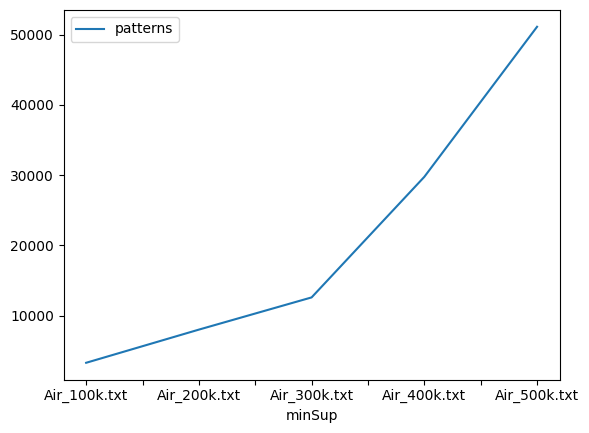

Graph for No Of Patterns is successfully generated!


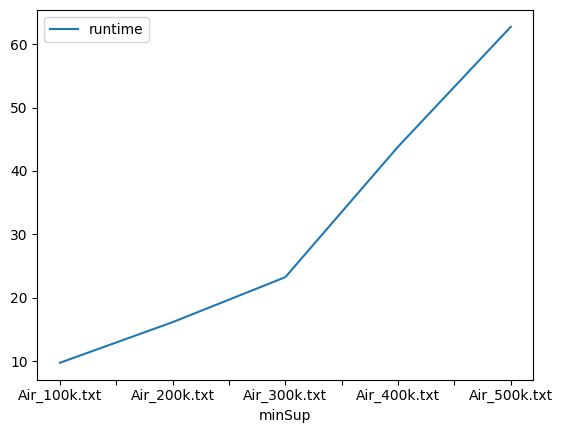

Graph for Runtime taken is successfully generated!


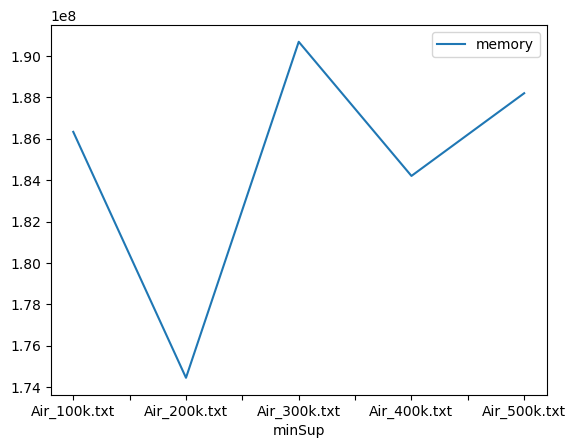

Graph for memory consumption is successfully generated!


In [8]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame()